# Analysis of Gun Deaths in US: 2012-2014
This analysis explores gun related deaths in US from 2012 to 2014.The data primarily comes from the Centers for Disease Control and Prevention's [Multiple Cause of Death database](https://www.cdc.gov/nchs/data_access/VitalStatsOnline.htm#Mortality_Multiple). This is derived from death certificates from all 50 states and the DC. It is considered one of the most inclusive appraisal of firearm deaths. Special thanks to [Gun Deaths in America](https://fivethirtyeight.com/features/gun-deaths/) for parsing and cleaning the [data](https://github.com/fivethirtyeight/guns-data) which I used. 

In [68]:
import pandas as pd
import numpy as np 

In [69]:
guns = pd.read_csv('data/guns.csv', index_col=0) # So that elements would start at index = 1 
print guns.shape
guns.head()

(100798, 10)


,year,month,intent,police,sex,age,race,hispanic,place,education
1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,4.0
2,2012,1,Suicide,0,F,21.0,White,100,Street,3.0
3,2012,1,Suicide,0,M,60.0,White,100,Other specified,4.0
4,2012,2,Suicide,0,M,64.0,White,100,Home,4.0
5,2012,2,Suicide,0,M,31.0,White,100,Other specified,2.0


**Explanation:**
- **intent**: Suicide, Homicide, Accidental, NA, or Unndetermined. 
- **police**: Whether a police office was involved in the shooting. Either 0 (false) or 1 (true). 
- **education**: Educational status of the victim. Could be one of the following:
<br> 1: Less than High School
<br> 2: Graduated from High School or equivalent
<br> 3: Some College
<br> 4: At least graduated from College
<br> 5: Not available <br>

** Data Redundancy:** Let's eliminate hispanic column since it is redundant. We already have race column. 

In [70]:
# Code to remove the hispanic column . Do it later

In [71]:
# Let's check the datatypes of all members to see if there is any inconsistencies 
guns.dtypes 

year           int64
month          int64
intent        object
police         int64
sex           object
age          float64
race          object
hispanic       int64
place         object
education    float64
dtype: object

The float values in the age and education column could indicate there are NaN values, since all members must be a whole numbers. 
We need to check how much of the data is NaN. 

In [72]:
guns.notnull().sum()

year         100798
month        100798
intent       100797
police       100798
sex          100798
age          100780
race         100798
hispanic     100798
place         99414
education    100745
dtype: int64

In [73]:
# Let's check the percentage of valid data 
total_no_rows = guns.shape[0]
total_no_rows_not_null = guns.notnull().sum()
(total_no_rows_not_null/total_no_rows)*100.0

year         100.000000
month        100.000000
intent        99.999008
police       100.000000
sex          100.000000
age           99.982143
race         100.000000
hispanic     100.000000
place         98.626957
education     99.947420
dtype: float64

Least amount of valid data is 98.62%. It means data is close to being perfect, unlike real world data, since the data is already cleaned. We can delete all rows with NaN values and still not loose much of the information. But that's not the best practice, let's try to substitute as many NaNs as we can with real values wherever applicable and only delete the rows where we can't. Let's investigate. 

In [74]:
# let's look at the education = NaN and 5.0 (not Available)
guns[(guns['education'].isnull()) | (guns['education'] == 5.0)]

,year,month,intent,police,sex,age,race,hispanic,place,education
10,2012,2,Suicide,0,M,NaN,Black,998,Home,5.0
33,2012,4,Suicide,0,M,22.0,Native American/Native Alaskan,100,Home,5.0
38,2012,5,Suicide,0,M,48.0,Native American/Native Alaskan,100,Home,5.0
42,2012,6,Homicide,0,M,26.0,Asian/Pacific Islander,100,Home,5.0
83,2012,10,Suicide,0,F,44.0,White,100,Other specified,5.0
117,2012,11,Suicide,0,M,48.0,White,998,Home,5.0
433,2012,6,Homicide,0,M,3.0,White,100,Other unspecified,NaN
495,2012,4,Homicide,0,F,5.0,White,100,Home,NaN
664,2012,9,Homicide,0,F,4.0,Black,100,Home,NaN
666,2012,9,Homicide,0,M,41.0,White,100,Home,5.0


We saw that a lot of education is either Not Available (5.0) or NaN for a very young group of population. Let's take a closer look. 

In [75]:
guns[(guns['age'] < 17) & ((guns['education'].isnull()) | (guns['education'] == 5.0))]

,year,month,intent,police,sex,age,race,hispanic,place,education
433,2012,6,Homicide,0,M,3.0,White,100,Other unspecified,NaN
495,2012,4,Homicide,0,F,5.0,White,100,Home,NaN
664,2012,9,Homicide,0,F,4.0,Black,100,Home,NaN
1626,2012,3,Homicide,0,M,0.0,Hispanic,210,Home,5.0
1627,2012,3,Homicide,0,M,3.0,Hispanic,210,Home,5.0
1770,2012,5,Homicide,0,F,1.0,Hispanic,270,Home,5.0
5727,2012,5,Homicide,0,M,4.0,White,100,Home,NaN
5929,2012,7,Homicide,0,F,6.0,White,100,School/instiution,NaN
6962,2012,4,Homicide,0,M,16.0,White,100,Other specified,5.0
9493,2012,7,Accidental,0,M,0.0,Black,100,Other unspecified,5.0


We saw that a lot of education is either Not Available (5.0) or NaN for a very young group of population aged less than 17 and more than 5. In a country which has one of the highest literacy rate, it is safe to assume, population under 16  and over 4 had education 1.0 (less than high school) and update the data accordingly. Let's see the data first.    

In [76]:
guns[(guns['age'] < 17) & (guns['age'] > 4) & ((guns['education'].isnull()) | (guns['education'] == 5.0))]

,year,month,intent,police,sex,age,race,hispanic,place,education
495,2012,4,Homicide,0,F,5.0,White,100,Home,NaN
5929,2012,7,Homicide,0,F,6.0,White,100,School/instiution,NaN
6962,2012,4,Homicide,0,M,16.0,White,100,Other specified,5.0
13890,2012,5,Homicide,0,F,5.0,Black,100,Street,NaN
14051,2012,7,Accidental,0,M,6.0,White,100,Home,NaN
14274,2012,9,Suicide,0,M,15.0,Black,100,Home,5.0
22756,2012,8,Homicide,0,F,6.0,Black,100,Other specified,5.0
32940,2012,5,Homicide,0,M,6.0,White,100,Other specified,NaN
33095,2012,11,Homicide,0,M,5.0,White,100,Farm,NaN
33609,2013,4,Accidental,0,F,5.0,Native American/Native Alaskan,100,Home,NaN


In [77]:
# Let's update the data 
index_temp = guns[(guns['age']< 17) & (guns['age'] > 4) & ((guns['education'].isnull()) | (guns['education'] == 5.0))].index
guns.loc[index_temp, 'education'] = 1.0


In [78]:
guns[(guns['age']< 17) & (guns['age'] > 4) & ((guns['education'].isnull()) | (guns['education'] == 5.0))]

,year,month,intent,police,sex,age,race,hispanic,place,education


Nothing to show, which means the table has been updated. 

A 1 year old categorized as the same education level as a kid betweeen 5 and 16, inclusive, is not making a lot of sense. We can also safely assume that a 1 year old is most likely to go to an elementary school in US in future. Let's categorize children under 5 as 0.0 (Less than elementary school). 

In [79]:
index_temp = guns[(guns['age']<5)].index
guns.loc[index_temp,'education'] = 0.0
guns[(guns['age']<5)]

,year,month,intent,police,sex,age,race,hispanic,place,education
433,2012,6,Homicide,0,M,3.0,White,100,Other unspecified,0.0
664,2012,9,Homicide,0,F,4.0,Black,100,Home,0.0
1626,2012,3,Homicide,0,M,0.0,Hispanic,210,Home,0.0
1627,2012,3,Homicide,0,M,3.0,Hispanic,210,Home,0.0
1770,2012,5,Homicide,0,F,1.0,Hispanic,270,Home,0.0
2046,2012,8,Homicide,0,F,4.0,Hispanic,210,Home,0.0
2057,2012,8,Homicide,0,M,1.0,Hispanic,210,Home,0.0
2492,2012,1,Homicide,0,F,1.0,Hispanic,210,Home,0.0
2493,2012,1,Homicide,0,M,3.0,Hispanic,210,Home,0.0
2589,2012,1,Homicide,0,M,2.0,Hispanic,210,Home,0.0


The incompleteness in education table is fixed. Intent table is almost perfect (99.999%). There is nothing we do with age (99.98%) and place (99.62%). Let's explore more. 

In [80]:
# First let's check all the unique values, we'll leave out age 
for col in guns.columns: 
    if col not in ['age']:
        print col, ':', guns[col].unique()

year : [2012 2013 2014]
month : [ 1  2  3  4  5  6  7  8  9 10 11 12]
intent : ['Suicide' 'Undetermined' 'Accidental' 'Homicide' nan]
police : [0 1]
sex : ['M' 'F']
race : ['Asian/Pacific Islander' 'White' 'Native American/Native Alaskan' 'Black'
 'Hispanic']
hispanic : [100 998 281 211 261 210 222 282 260 270 231 237 200 223 226 275 250 234
 280 227 224 286 233 271 220 225 235 242 212 221 239 299 232 291 217 252
 209 238 218]
place : ['Home' 'Street' 'Other specified' nan 'Other unspecified'
 'Trade/service area' 'Farm' 'Industrial/construction' 'School/instiution'
 'Sports' 'Residential institution']
education : [  4.   3.   2.   1.   5.   0.  nan]


In [81]:
# I am primarily interested with intent. 
guns.intent.value_counts(ascending=False)

Suicide         63175
Homicide        35176
Accidental       1639
Undetermined      807
Name: intent, dtype: int64

In [82]:
# Let's normalize the values. Also note that normalize = False excludes NaN
guns.intent.value_counts(ascending=False, dropna=False, normalize=True)

Suicide         0.626749
Homicide        0.348975
Accidental      0.016260
Undetermined    0.008006
NaN             0.000010
Name: intent, dtype: float64

In [83]:
# For visualization purpose 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style='white', color_codes=True) # http://seaborn.pydata.org/generated/seaborn.set.html for more info 
%matplotlib inline 
# the output of plotting commands is displayed inline within frontends like the Jupyter notebook, 
# directly below the code cell that produced it. 

## Gender Distribution 

In [84]:
# Let's use the bar plot for better visualization
intent_sex = guns.groupby(['intent', 'sex'])['intent'].count().unstack('sex') # unstack gives hierarchical column levels 
# groups by intent and then sex, second 'intent' throws away rest of the categories 
print intent_sex

sex              F      M
intent                   
Accidental     218   1421
Homicide      5373  29803
Suicide       8689  54486
Undetermined   169    638


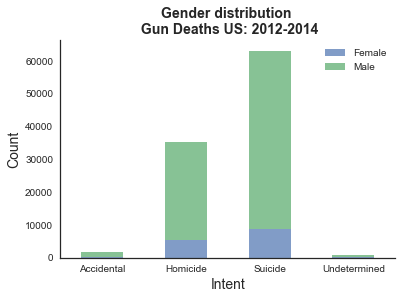

In [85]:
ax = intent_sex.plot(kind='bar', stacked=True, alpha=0.7) # https://pandas.pydata.org/pandas-docs/stable/visualization.html
# stacked = True for stacked plot otherwise they will be in tandem. alpha = 0.7 for color contrast 
ax.set_xlabel('Intent', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.xticks(rotation=0) # rotation of the label 
ax.legend(labels=['Female', 'Male'], frameon=False, loc=0) # loc = location on the sheet, frameon = bool, if we need a frame 
plt.title ('Gender distribution \n Gun Deaths US: 2012-2014', fontsize=14, fontweight='bold')
sns.despine() # removes the boxing of the plot 
plt.show() # removes the showing of object <matplotlib.text.Text at 0x14f576d8>

### Suicide 
We see that suicide contributes to 2/3 of all gun deaths. Media usually covers only homicides, which make it sound like homicide is the biggest contibutor in gun deaths. 
I highly recommend reading [The Suicide paradox](http://freakonomics.com/podcast/new-freakonomics-radio-podcast-the-suicide-paradox/) on the Freakonomics podcast by David Lester, a professor of psychology at Richard Stockton College of New Jersey who is considered the dean of suicide studies. FACT: "...But the fact is that suicide is more than twice as common as homicide...". 
Suicide case raises one important question: 
- How easily can a someone resort to other means to commit a suicide if he can't legally acquire a gun ? Other means include illegally acquired guns, poisoning, hanging, jumping from height, drowning, drugs overdose, wrist cutting, suicide attack etc.

### Homicide
Even the homicide case which is resposible for 1/3 of all gun deaths raises few important questions.  
- We need more data to answer how the guns were acquired - legally or illegally.
- What proportion of homicide deaths were caused due to legally acquired guns ? (If it is too low- gun control won't make sense)
- How easily can a criminal resort to other means to commit a murder if he can't legally acquire a gun ? Other means include illegally acquired guns, poisoning, knifes etc. 

## Education 

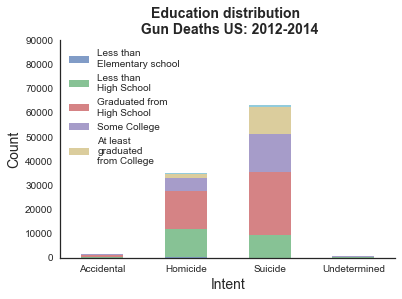

In [86]:
intent_edu = guns.groupby(['intent', 'education'])['intent'].count().unstack('education')
ax = intent_edu.plot(kind='bar', stacked=True, alpha=0.7) # https://pandas.pydata.org/pandas-docs/stable/visualization.html
# stacked = True for stacked plot otherwise they will be in tandem. alpha = 0.7 for color contrast 
ax.set_xlabel('Intent', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.xticks(rotation=0) # rotation of the label 
ax.legend(labels=['Less than\nElementary school', 'Less than\nHigh School','Graduated from\nHigh School',
                 'Some College', 'At least\ngraduated\nfrom College'], 
                  frameon=False, prop={'size':10}, loc='upper left') # loc = location on the sheet, 
                  # frameon = bool, if we need a frame 
plt.ylim(ymin=0, ymax=90000)
plt.title ('Education distribution \n Gun Deaths US: 2012-2014', fontsize=14, fontweight='bold')
sns.despine()
plt.show() # removes the showing of object <matplotlib.text.Text at 0x14f576d8>

Larger percentage of people graduated from college (>20%) have suicide gun deaths than homicide (<10%). Controlling guns would make no sense here since educated people know other means of committing suicide. Same with people enrolled in college. 
But this sort of academic qualification is of little to no help in prediction and assesment of gun control laws. We are better off just reosrting to our binary metric : Suicide vs Homicide 

## Place 

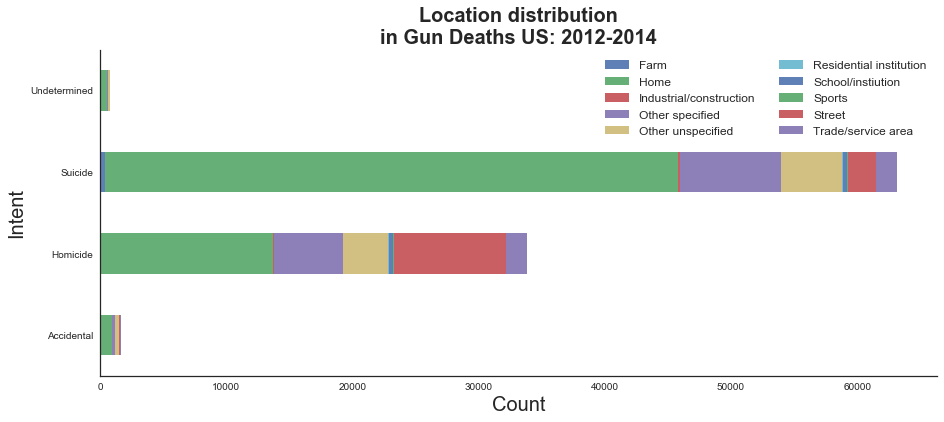

In [87]:
intent_place = guns.groupby(['intent', 'place'])['intent'].count().unstack('place')
ax = intent_place.plot(kind = 'barh', figsize=(15,6), stacked=True, alpha=0.9)
ax.set_xlabel('Count', fontsize=20)
ax.set_ylabel('Intent', fontsize=20)
ax.legend(loc=0, ncol=2, prop={'size':12}, frameon=False)
plt.title('Location distribution\nin Gun Deaths US: 2012-2014', fontsize=20, fontweight='bold')
sns.despine()
plt.show()

### Let's consolidate the public places like Trade/service area, Industrial/construction and School/instiution into Street. Note that instiution spelling is wrong ! We can't correct it 'coz that's the way it is in data source 

In [88]:
# let's merge 'street' with 'Trade/service area','School/institution' & 'Industrial/construction' 
index_temp = guns[(guns['place'] == 'Trade/service area') | (guns['place'] == 'Industrial/construction') | 
                   (guns['place'] == 'School/instiution') | (guns['place'] == 'Street')].index 
guns.loc[index_temp,'place'] = 'Public Places'

# Let's merge 'Other specified' and 'Other unspecified' 
index_temp = guns[(guns['place'] == 'Other specified') | (guns['place'] == 'Other unspecified')].index 
guns.loc[index_temp,'place'] = 'Other'
guns.place.value_counts()

Home                       60486
Other                      22618
Public Places              15509
Farm                         470
Residential institution      203
Sports                       128
Name: place, dtype: int64

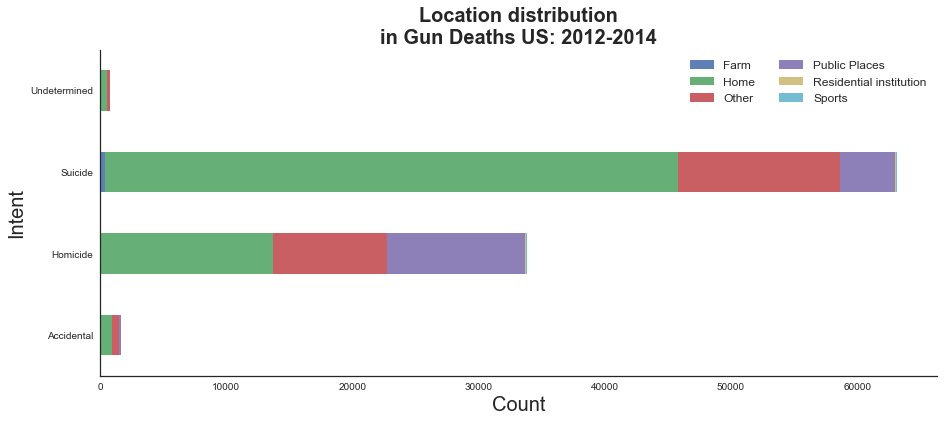

In [89]:
intent_place = guns.groupby(['intent', 'place'])['intent'].count().unstack('place')
ax = intent_place.plot(kind = 'barh', figsize=(15,6), stacked=True, alpha=0.9)
ax.set_xlabel('Count', fontsize=20)
ax.set_ylabel('Intent', fontsize=20)
ax.legend(loc=0, ncol=2, prop={'size':12}, frameon=False)
plt.title('Location distribution\nin Gun Deaths US: 2012-2014', fontsize=20, fontweight='bold')
sns.despine()
plt.show()

We can see that most of the Suicide happens at home. 1/3rd of homicide case happens on public places and  1/3rd at home. 

###  What percentage of cases were police officers involved in ? 

In [90]:
100 * guns.police.value_counts(normalize=True) # * 100 for percent

0    98.609099
1     1.390901
Name: police, dtype: float64

### It's not the police brutality or anythign like that

### Let's look at the racial distribution 

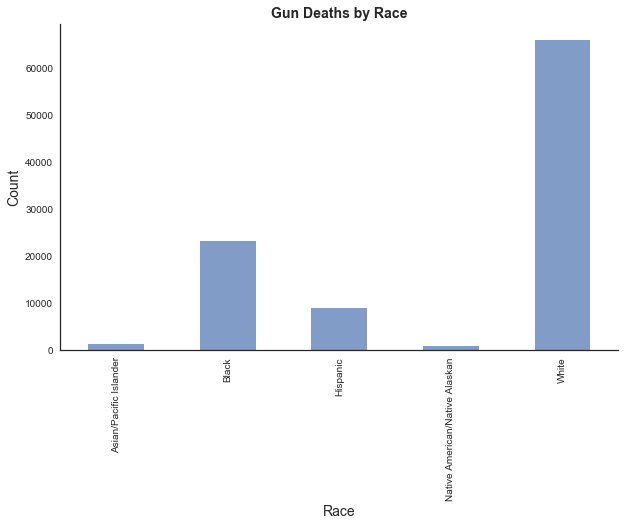

In [91]:
fig = plt.figure(figsize=(10,6))
deaths_by_race = guns.groupby(['race'])['race'].count()
ax = deaths_by_race.plot(kind='bar', alpha=0.7) # https://pandas.pydata.org/pandas-docs/stable/visualization.html
ax.set_xlabel('Race', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.xticks(rotation=90) # rotation of the label 
plt.title ('Gun Deaths by Race', fontsize=14, fontweight='bold')
sns.despine()
plt.show() # removes the showing of object <matplotlib.text.Text at 0x14f576d8>

### Let's see the change over the years 

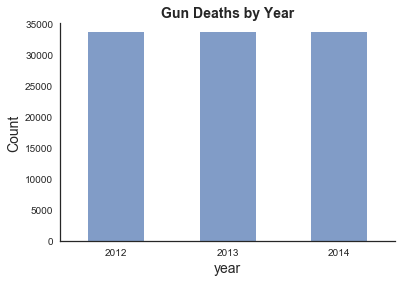

In [92]:
deaths_by_year = guns.groupby(['year'])['year'].count()
ax = deaths_by_year.plot(kind='bar', alpha=0.7) # https://pandas.pydata.org/pandas-docs/stable/visualization.html
ax.set_xlabel('year', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.xticks(rotation=0) # rotation of the label 
plt.ylim(ymin=0, ymax=35000)
plt.title ('Gun Deaths by Year', fontsize=14, fontweight='bold')
sns.despine()
plt.show() # removes the showing of object <matplotlib.text.Text at 0x14f576d8>

### The change is insignificant. 

### Seasonal/Monthly Analysis: Let's look at the number of deaths vs months for all years 

In [93]:
# Let's sort the data by year and month first 
guns.sort_values(['year', 'month'], inplace=True) # inplace = True will update the original table 
guns.head()

,year,month,intent,police,sex,age,race,hispanic,place,education
1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,4.0
2,2012,1,Suicide,0,F,21.0,White,100,Public Places,3.0
3,2012,1,Suicide,0,M,60.0,White,100,Other,4.0
12,2012,1,Suicide,0,M,21.0,Native American/Native Alaskan,100,Home,2.0
135,2012,1,Suicide,0,F,59.0,White,100,Home,2.0


In [94]:
# Let's look at the tail too
guns.tail()

,year,month,intent,police,sex,age,race,hispanic,place,education
100793,2014,12,Homicide,0,M,31.0,Black,100,Other,2.0
100794,2014,12,Homicide,0,M,36.0,Black,100,Home,2.0
100795,2014,12,Homicide,0,M,19.0,Black,100,Public Places,2.0
100796,2014,12,Homicide,0,M,20.0,Black,100,Public Places,2.0
100797,2014,12,Homicide,0,M,22.0,Hispanic,260,Public Places,1.0


For further analysis that requires date, we need a date object. A datetime object implies year, month and day. Since we cannot create a datetime object without a day which we don't have. Let's just combine month and year (2 date values of type int64) and assign '1' in the day value. 

In [95]:
import datetime 

In [96]:
# The purpose of *10000 and the *100 are to convert 2012, 01, 01 into 20120101 for readability 
guns['date'] = pd.to_datetime((guns.year * 10000 + guns.month * 100 + 1).apply(str),format = '%Y%m%d')
guns.dtypes

year                  int64
month                 int64
intent               object
police                int64
sex                  object
age                 float64
race                 object
hispanic              int64
place                object
education           float64
date         datetime64[ns]
dtype: object

In [97]:
guns.head()

,year,month,intent,police,sex,age,race,hispanic,place,education,date
1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,4.0,2012-01-01
2,2012,1,Suicide,0,F,21.0,White,100,Public Places,3.0,2012-01-01
3,2012,1,Suicide,0,M,60.0,White,100,Other,4.0,2012-01-01
12,2012,1,Suicide,0,M,21.0,Native American/Native Alaskan,100,Home,2.0,2012-01-01
135,2012,1,Suicide,0,F,59.0,White,100,Home,2.0,2012-01-01


In [98]:
# Since we don't need 'year' and 'month' columns 
# del guns['year']
# del guns['month']
# guns.head()

In [99]:
# Let's create a separate dataframe for monthly count # 1
import calendar 

In [100]:
# Let's create a separate dataframe for monthly count # 2
grouped_monthly_rates = guns.groupby('date').size() # Unlike MySQL, just groupby won't work here. size() method is required
grouped_monthly_rates.head()

date
2012-01-01    2758
2012-02-01    2357
2012-03-01    2743
2012-04-01    2795
2012-05-01    2999
dtype: int64

In [101]:
# Let's create a separate dataframe for monthly count # 3
# Since we don't have a column name for the Count for those specific dates
monthly_rates = pd.DataFrame(grouped_monthly_rates, columns = ['Count'])
print monthly_rates.index.dtype # date column is just an index 
print monthly_rates.Count.dtype
print monthly_rates.shape
monthly_rates.head()

datetime64[ns]
int64
(36, 1)


,Count
date,
2012-01-01,2758
2012-02-01,2357
2012-03-01,2743
2012-04-01,2795
2012-05-01,2999


### Let's do a monthly plot from 2012 - 2014 

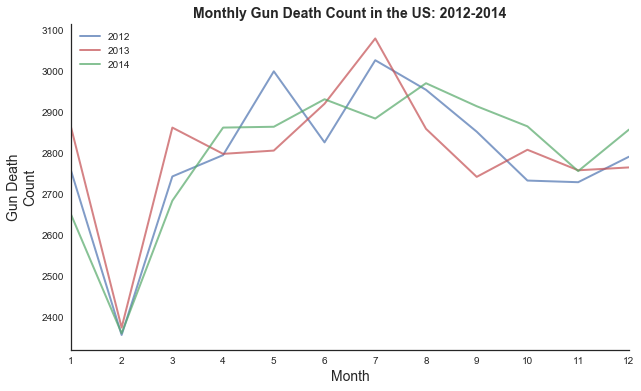

In [102]:
fig = plt.figure(figsize=(10,6)) # figsize, tuple of integers, width and height in inches 
plt.plot(monthly_rates.index.month[0:12], monthly_rates['Count'][0:12], label = '2012',
        linestyle='-', linewidth=2., alpha=0.7)
plt.plot(monthly_rates.index.month[12:24], monthly_rates['Count'][12:24], label = '2013',
        linestyle='-', linewidth=2., alpha=0.7, color ='r')
plt.plot(monthly_rates.index.month[24:36], monthly_rates['Count'][24:36], label = '2014',
        linestyle='-', linewidth=2., alpha=0.7, color = 'g')
plt.xlim(xmin=1, xmax=12)
plt.xticks(np.arange(1,13,1)) # So that it will show all numbers, 1 through 12 
plt.legend(loc='upper left', frameon=False)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Gun Death\nCount', fontsize=14)
plt.title('Monthly Gun Death Count in the US: 2012-2014', fontsize=14, fontweight='bold')
sns.despine()
plt.show()

### We saw that february saw the lowest number of gun deaths and July saw higest.  Highest number of gun deaths occured during summer time. Since most of the gun deaths victims are done with high schools or enrolled in college, may be it has to do with leisure. 

### For better visualization, let's start our Y axis from 0 

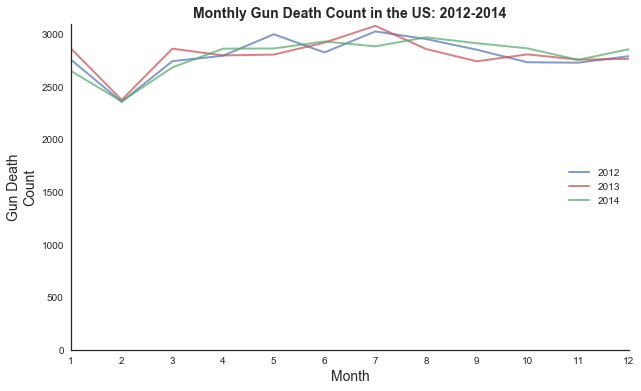

In [103]:
fig = plt.figure(figsize=(10,6))
plt.plot(monthly_rates.index.month[0:12], monthly_rates['Count'][0:12], label = '2012',
        linestyle='-', linewidth=2., alpha=0.7)
plt.plot(monthly_rates.index.month[12:24], monthly_rates['Count'][12:24], label = '2013',
        linestyle='-', linewidth=2., alpha=0.7, color ='r')
plt.plot(monthly_rates.index.month[24:36], monthly_rates['Count'][24:36], label = '2014',
        linestyle='-', linewidth=2., alpha=0.7, color = 'g')
plt.xlim(xmin=1, xmax=12)
plt.ylim(ymin=0, ymax=3100)
plt.xticks(np.arange(1,13,1)) # So that it will show all numbers, 1 through 12 
plt.legend(loc='center right', frameon=False)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Gun Death\nCount', fontsize=14)
plt.title('Monthly Gun Death Count in the US: 2012-2014', fontsize=14, fontweight='bold')
sns.despine()
plt.show()

### We can again see there is not much variation from one year to another 

## Age Distribution 
### Histogram is most appropriate to see deaths vs age groups 

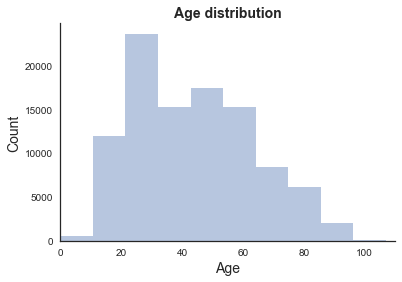

In [104]:
age_freq = guns.age.value_counts()
sorted_age_freq = age_freq.sort_index() # Since index is our age group
# and for Histogram we need it sorted
# sorted_age_freq.head() # printing to verify  
plt.hist(guns['age'], range=(0,107), alpha=0.4)
plt.xlim(xmin=0, xmax=110)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Age distribution', fontsize=14, fontweight='bold')
sns.despine()
plt.show()

Let's look at the age histogram for the suicide deaths vs the homicide deaths

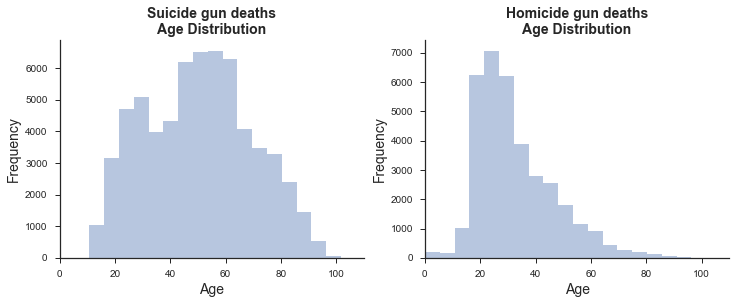

In [105]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

suicide = guns[guns['intent'] == 'Suicide']
homicide = guns[guns['intent'] == 'Homicide']

ax1.hist(suicide.age, 20, range=(0,107), alpha=0.4) # 20 = number of histogram bars 
ax1.set_title('Suicide gun deaths\nAge Distribution', fontsize=14, fontweight='bold')
ax2.hist(homicide.age, 20, range=(0,107), alpha=0.4)
ax2.set_title('Homicide gun deaths\nAge Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Age', fontsize=14)
ax2.set_xlabel('Age', fontsize=14)
ax1.set_ylabel('Frequency', fontsize=14)
ax2.set_ylabel('Frequency', fontsize=14)
ax1.tick_params(axis='both', which='both',length=5)
ax2.tick_params(axis='both', which='both',length=5)
ax1.set_xlim(xmin=0, xmax=110)
ax2.set_xlim(xmin=0, xmax=110)
sns.despine()
plt.show()

We can see that most of the homicide deaths occured around the age 20-30, while most suicide cases occured around 45-60, with some noticeable peak at 20-30

### Let's plot a univariate distribution of observations.

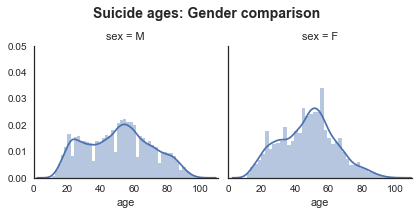

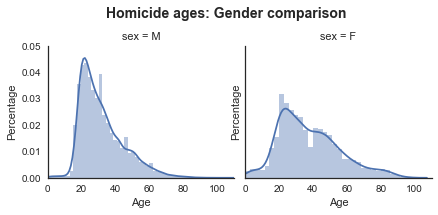

In [106]:
g = sns.FacetGrid(suicide, col='sex')  
g.map(sns.distplot, 'age')
plt.subplots_adjust(top=0.8)
g.set(xlim=(0, 110), ylim=(0, 0.05))
g.fig.suptitle('Suicide ages: Gender comparison', fontsize=14, fontweight='bold')
g = sns.FacetGrid(homicide, col='sex') 
g.map(sns.distplot, 'age')
plt.subplots_adjust(top=0.8)
g.set(xlim=(0, 110), ylim=(0, 0.05), xlabel='Age', ylabel='Percentage', )
g.fig.suptitle('Homicide ages: Gender comparison', fontsize=14, fontweight='bold')

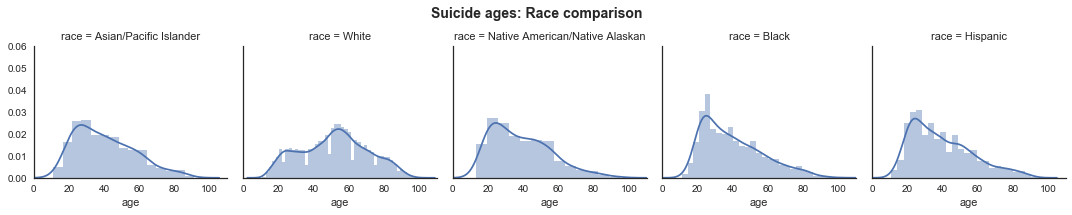

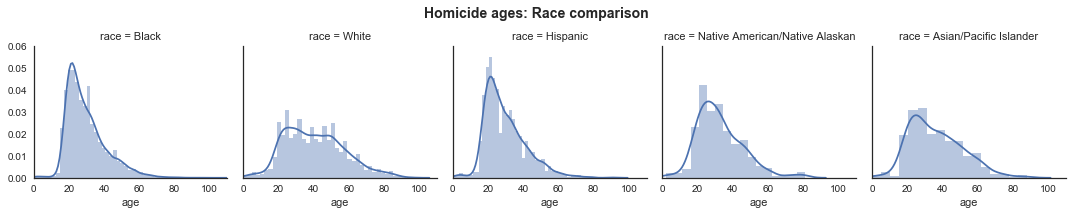

In [107]:
g = sns.FacetGrid(suicide, col='race')  
g.map(sns.distplot, 'age')
g.set(xlim=(0, None))
plt.subplots_adjust(top=0.8)
g.set(xlim=(0, 110), ylim=(0, 0.06), xlabel='age')
g.fig.suptitle('Suicide ages: Race comparison', fontsize=14, fontweight='bold')
g = sns.FacetGrid(homicide, col='race') 
g.map(sns.distplot, 'age')
g.set(xlim=(0, None))
plt.subplots_adjust(top=0.8)
g.set(xlim=(0, 110), ylim=(0, 0.06), xlabel='age')
g.fig.suptitle('Homicide ages: Race comparison', fontsize=14, fontweight='bold')

This is not convinient to compare. Let's order them and plot them again. 

In [108]:
# Ordering them 
race_ordered = ['Black', 'White', 'Hispanic', 'Asian/Pacific Islander', 'Native American/Native Alaskan']
guns['race'] = guns['race'].astype('category')
guns.race.cat.set_categories(race_ordered, inplace=True)

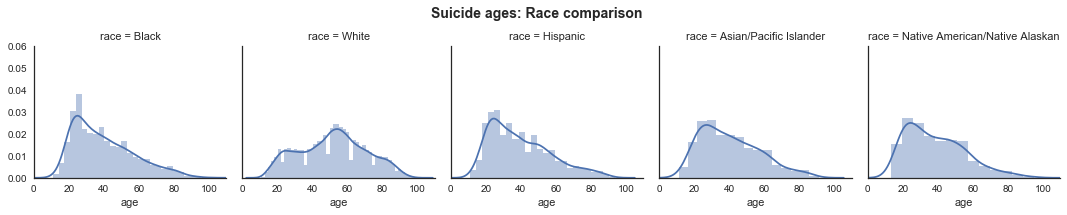

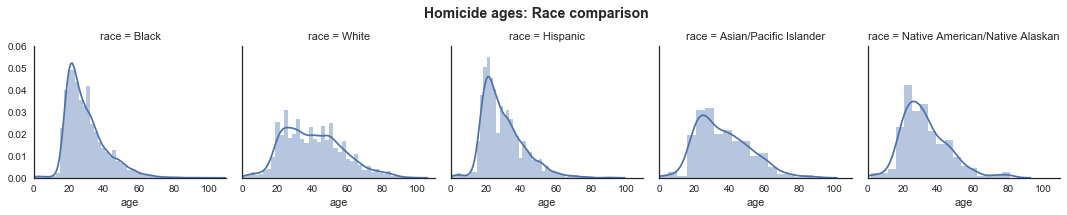

In [109]:
suicide = guns[guns['intent'] == 'Suicide']
homicide = guns[guns['intent'] == 'Homicide']

g = sns.FacetGrid(suicide, col='race')  
g.map(sns.distplot, 'age')
g.set(xlim=(0, None))
plt.subplots_adjust(top=0.8)
g.set(xlim=(0, 110), ylim=(0, 0.06), xlabel='age')
g.fig.suptitle('Suicide ages: Race comparison', fontsize=14, fontweight='bold')
g = sns.FacetGrid(homicide, col='race') 
g.map(sns.distplot, 'age')
g.set(xlim=(0, None))
plt.subplots_adjust(top=0.8)
g.set(xlim=(0, 110), ylim=(0, 0.06), xlabel='age')
g.fig.suptitle('Homicide ages: Race comparison', fontsize=14, fontweight='bold')

### Suicide peak in most races is in 20s but for white it is 50s. Could be related to more rampant midlife crisis among whites ! For whites Homicide peaks in 20s and it is more evenly distributed while homicide peaks in 30s for other races.  

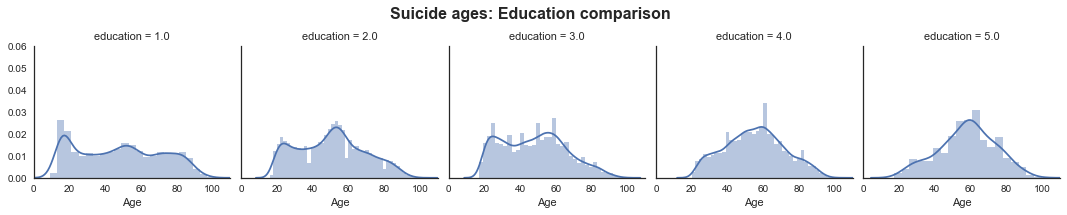

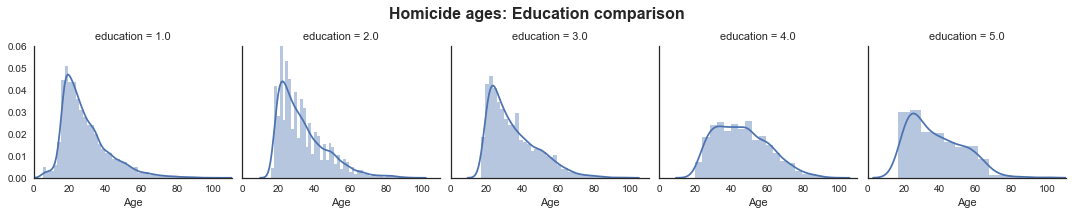

In [110]:
# Let's ignore education = 0 and 5 - since these are all very young ages
# since we have categorized children under 5 as 0.0 (Less than elementary school)
g = sns.FacetGrid(suicide[suicide.education > 0 ], col='education')
g.map(sns.distplot, 'age')
plt.subplots_adjust(top=0.8)
g.set(xlim=(0, 110), ylim=(0, 0.06), xlabel='Age')
g.fig.suptitle('Suicide ages: Education comparison', fontsize=16, fontweight='bold')
g = sns.FacetGrid(homicide[homicide.education > 0], col='education') 
g.map(sns.distplot, 'age')
plt.subplots_adjust(top=0.8)
g.set(xlim=(0, 110), ylim=(0, 0.06), xlabel='Age')
g.fig.suptitle('Homicide ages: Education comparison', fontsize=16, fontweight='bold')

**Education**
<br> 1: Less than High School
<br> 2: Graduated from High School or equivalent
<br> 3: Some College
<br> 4: At least graduated from College
<br> 5: Not available <br>

### All of the homicides plot peaks are in the area of 20-25 years old, and this is similar for suicides in cases where the education was low. However, when the victim was of college university [3.0-4.0] the peak is also around age 60.

# KDE Plot - Kernel Density Estimation 
### This plot is useful for looking at univariate relations. It creates and visualizes a kernel density estimate of the underlying feature.

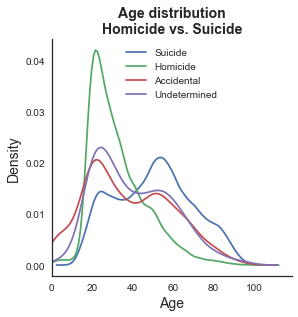

In [111]:
# We need to limit the x-axis, starting from 0 BECAUSE: 
# The KDE plot make it look like there are negative ages in our dataset, but that is not the case. 
# The reason for that is that KDE smoothes the lines and thus manipulates the truth. We can limit the x axis.
sns.FacetGrid(guns, hue='intent', size=4).map(sns.kdeplot, 'age')
plt.legend(loc=9, frameon=False)
plt.xlim(xmin=0)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Age distribution\nHomicide vs. Suicide', fontsize=14, fontweight='bold')

###  Infact this is very similar to the plot we saw before, only seeing it on the same grid makes it easier to see differences.

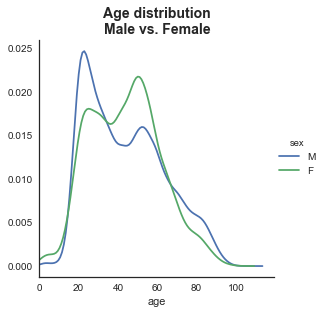

In [112]:
sns.FacetGrid(guns, hue='sex', size=4).map(sns.kdeplot,'age').add_legend()
plt.xlim(xmin=0)
plt.title('Age distribution\nMale vs. Female', fontsize=14, fontweight='bold')

### Let's make different KDE plots for each intent 

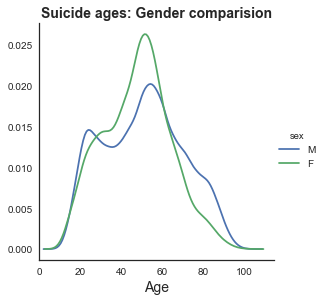

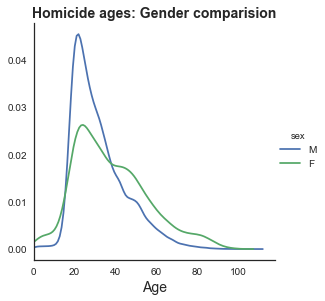

In [113]:
sns.FacetGrid(suicide, hue='sex', size=4).map(sns.kdeplot, 'age').add_legend()
plt.xlabel('Age', fontsize=14)
plt.xlim(xmin=0)
plt.title('Suicide ages: Gender comparision', fontsize=14, fontweight='bold')

sns.FacetGrid(homicide, hue='sex', size=4).map(sns.kdeplot, 'age').add_legend()
plt.xlabel('Age', fontsize=14)
plt.xlim(xmin=0)
plt.title('Homicide ages: Gender comparision', fontsize=14, fontweight='bold')

# Violin Plots Analysis 

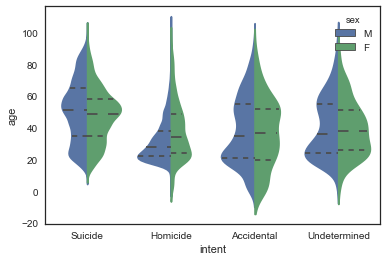

In [114]:
sns.violinplot(x='intent', y='age', hue='sex', split=True, data=guns, size=4, inner='quart')
# hue = data we are interested in 
# split = True so that it will split into male and female 
# inner = 'quart', draws the ticks for quartiles 

### Accidental column won't tell us much since the distribution and quartiles are very similar between genders. However, the distribution between male and female in homicide differes in quartiles and in the range of the quarters. This may suggest that we need to combine age and gender as a one unique independent variable that can predict gun deaths. 

### Since most of our variables are categorical, scatter or scatter matrix plots are of little value. Let's not bother about those. 

# Major Takeaways and Future Work 

## Suicide 
- We see that suicide contributes to 2/3 of all gun deaths. Media usually covers only homicides, which make it sound like homicide is the biggest contibutor in gun deaths. The fact is that suicide is more than twice as common as homicide. 
- How easily can a someone resort to other means to commit a suicide if he can't legally acquire a gun ? Other means include illegally acquired guns, poisoning, hanging, jumping from height, drowning, drugs overdose, wrist cutting, suicide attack etc.

## Homicide 
Even the homicide case which is resposible for 1/3 of all gun deaths raises few important questions.  
- We need more data to answer how the guns were acquired - legally or illegally.
- What proportion of homicide deaths were caused due to legally acquired guns ? (If it is too low- gun control won't make sense)
 How easily can a criminal resort to other means to commit a murder if he can't legally acquire a gun ? Other means include illegally acquired guns, poisoning, knifes etc. 
 
## Education 
Larger percentage of people graduated from college (more than 20%) have suicide gun deaths than homicide (less than 10%). Controlling guns would make no sense here since educated people know other means of committing suicide. Same with people enrolled in college. But this sort of academic qualification is of little to no help in prediction and assesment of gun control laws.

## Months
There is a large number of gun deaths during summer time - June, July and August, and a smallest number on February.It might have to do with leisure since most of the gun deaths victims are in high schools or enrolled in college. I am not sure about it. 

## Prediction 
Age, gender, education and age+gender are helpful independent variables in predicitng the intent.

## Future Work 
Math modeling for prediction. 